<h1>Questions to be handed in on first and second derivatives and their relationships</h1>

<h2>Exploring first and second derivatives with Julia:</h2>

<p>To get started, we load the <code>MTH229</code> package:</p>

In [1]:
using MTH229
using SimplePlots

<p>Recall, the <code>MTH229</code> package overloads <code>&#39;</code> so that the same prime notation of mathematics is available in <code>Julia</code> for indicating derivatives of functions.</p>

<h3>Quick background</h3>

<p>Read about this material here: <a href="http://mth229.github.io/first-second-derivatives.html">Exploring first and second derivatives with Julia</a>.</p>

<p>For the impatient, this assignment looks at the relationship between a function, $f(x)$, and its first and second derivatives: $f'(x)$ and $f''(x)$. The basic relationship can be summarized (though the devil is in the details) by:</p>

<ul>
<li><p>If the first derivative is <em>positive</em> on $(a,b)$ then the function is <em>increasing</em> on $(a,b)$.</p>
</li>
<li><p>If the second derivative is <em>positive</em> on $(a,b)$ then the function is <em>concave up</em> on $(a,b)$.</p>
</li>
</ul>

<p>(The "devil" here is that the converse statements are usually - but not always - true.)</p>

<p>Some key  definitions are:</p>

<ul>
<li><p>A <strong>critical</strong> point of $f$ is a value in the domain of $f(x)$ for</p>
</li>
</ul>

<p>which the derivative is $0$ or undefined. These are often–-but <strong>not always</strong>–-where $f(x)$ has a local maximum or minimum.</p>

<ul>
<li><p>An <strong>inflection point</strong> of $f$ is a value in the domain of $f(x)$</p>
</li>
</ul>

<p>where the concavity of $f$ <em>changes</em>. (These are <em>often</em>–-but <strong>not always</strong>–-where $f''(x)=0$.)</p>

<p>These two relationships and definitions are put to use to characterize <em>local extrema</em> of a function via one of two "derivative" tests:</p>

<ul>
<li><p>The <strong>first derivative test</strong>:  This states that  if $c$ is a critical point of $f(x)$ then if $f'(x)$ changes sign</p>
</li>
</ul>

<p>from $+$ to $-$ at $c$ then $f(c)$ is a local maximum and if $f'(x)$ changes sign from $-$ to $+$ then $f(c)$ is a local minimum. If there is no sign change, then $f(c)$ is neither a local minimum or maximum.</p>

<ul>
<li><p>The <strong>second derivative test</strong>: This states that if $c$ is a critical point of $f(x)$ and $f''(c) > 0$ then $f(c)$ is a local minimum and if $f''(c) < 0$ then $f(c)$ is a local maximum.</p>
</li>
</ul>

<p>We investigate these concepts in <code>Julia</code> both graphically and numerically.</p>

<p>For the graphical exploration, the following function is quite useful. It is used to plot a function <code>f</code> using two colors; the color choice depending on whether the second function, <code>g</code> is positive or not. This function is in the <code>MTH229</code> package.</p>

In [1]:
function plotif(f, g, a, b)
  plot([f, x -> g(x) > 0.0 ? f(x) : NaN], a, b, linewidth=5, legend=false)
end

<p>This function can be used to graphically illustrate where the graph of <code>f</code> is <em>positive</em>, <em>increasing</em>, or <em>concave up</em>: <code>plotif&#40;f, f, a, b&#41;</code> will show a different color when $f(x)$ is <em>positive</em>, <code>plotif&#40;f, f&#39;, a, b&#41;</code> will show a different color when $f(x)$ is <em>increasing</em>, and  <code>plotif&#40;f, f&#39;&#39;, a, b&#41;</code> will show a different color when $f(x)$ is <em>concave up</em>. For example, here we see where the following <code>f</code> is increasing:</p>

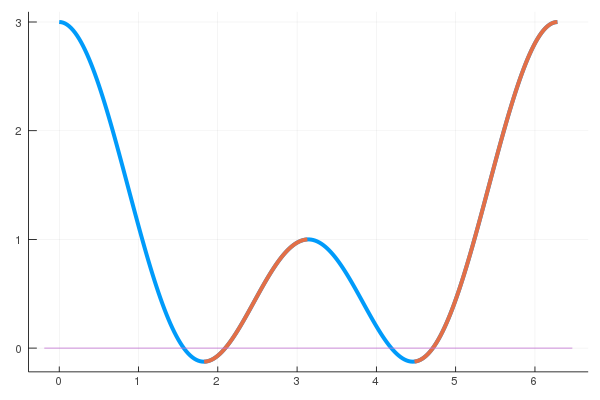

In [1]:
f(x) = 1 + cos(x) + cos(2x)
plotif(f, f', 0, 2pi)  # color increasing
plot!(zero)

<hr />

<p>Once eyes are trained to identify zeros, critical points, or inflection points of a function, we can use numeric methods to zoom in on more accurate values.  Recall, <code>fzero&#40;f, a, b&#41;</code> will find a zero of <code>f</code> <strong>if</strong> <code>&#91;a,b&#93;</code> is a <em>bracketing</em> interval (<code>f</code> takes different signs at the endpoints); and <code>fzeros&#40;f, a, b&#41;</code> will look for all zeros of <code>f</code> within the interval <code>&#91;a,b&#93;</code>, not necessarily a bracketing one. The <code>fzeros</code> function returns a container of values, which may, of course, be empty.</p>

<p>For example to find a zero in <code>f</code> near <code>1.5</code> we would first graph. We can then identify $[1,2]$ as a bracketing interval, and solve with:</p>

In [1]:
f(x) = 1 + cos(x) + cos(2x)
fzero(f, 1, 2)

1.5707963267948966

<p>If our task was to get <em>all</em> critical points of <code>f</code> in the interval $(0, 2\pi)$, then <code>fzeros</code> is the easier-to-use choice: As <code>f</code> is continuously differentiable, all critical points are given by solving $f'(x)=0$:</p>

In [1]:
zs = fzeros(f', 0, 2pi)

5-element Array{Float64,1}:
 0.0
 1.8234765819369751
 3.141592653589793
 4.459708725242611
 6.283185307179586

<p>The answer from <code>fzeros</code> is a vector of values. You can get individual ones different ways or work with them all at once. For example, here is the function's value at each of the critical points:</p>

In [1]:
f.(zs)   # or more explicitly map(f, zs)

5-element Array{Float64,1}:
  3.0
 -0.125
  1.0
 -0.125
  3.0

<hr />